In [3]:
import sys
sys.path.insert(0, '../')
from lib import *

----------
Doing:  substract_Pedestal  on channel: 0
----------
Doing:  compute_Peak  on channel: 0
----------
Doing:  compute_AverageWaveforms  on channel: 0
AvWvf
AvWvf_Center_Peak
AvWvf_Center_Rise


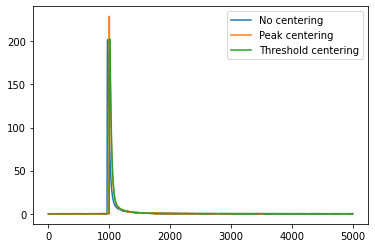

In [4]:
# path ="/media/rodrigoa/2Gb/data/SBND_XA_PDE/SBND_XA_VIS/joython/"
path="/media/rodrigoa/DiscoDuro/SBND_XA_VIS/joython/"

for run in range(6,7):
    if run==3:continue # Rodrigo forgot one run :D
    Run_props=open_run_properties(run,"../macros/Runs_list.xlsx")
    run_path=path+"run"+str(run).zfill(2)+"/";

    compress=False
    
    
    # One channel at a time: 
    # loading all ch waveforms might demmand too much memory, 
    # remember to always delete between runs to prevent overloading)

    # for ch in Run_props["Channels"]:
    CH=0
    for ch in [CH]:

        ADC=open_run_var(run_path,"RawADC",[ch],compressed=compress)
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars",[ch],compressed=compress)
        ADC=do_run_things((ADC,Pedestal_vars,Run_props["Polarity"]),substract_Pedestal)
        
        Peak_vars=do_run_things(ADC,compute_Peak)

        # Average_waveform
        
        Avg_wvf=do_run_things((ADC,Peak_vars),compute_AverageWaveforms)
        for alg in Avg_wvf[0]:
            print (alg)
            plt.plot(Avg_wvf[0][alg])
        plt.legend(["No centering","Peak centering","Threshold centering"])

        del Pedestal_vars, ADC